In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
df = pd.read_csv("data/data.csv")

In [3]:
# Overview of the dataset
num_rows, num_cols = df.shape
data_types = df.dtypes


In [4]:
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
print("\nData types:")
print(data_types)


Number of rows: 95662
Number of columns: 16

Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


Extract Only Numeric Parts From Columns

In [5]:
df['TransactionId'] = df['TransactionId'].str.extract('(\d+)') # Extract only numeric part
df['BatchId'] = df['BatchId'].str.extract('(\d+)') # Extract only numeric part
df['AccountId'] = df['AccountId'].str.extract('(\d+)') # Extract only numeric part
df['SubscriptionId'] = df['SubscriptionId'].str.extract('(\d+)') # Extract only numeric part
df['CustomerId'] = df['CustomerId'].str.extract('(\d+)') # Extract only numeric part
df['ProviderId'] = df['ProviderId'].str.extract('(\d+)') # Extract only numeric part
df['ProductId'] = df['ProductId'].str.extract('(\d+)') # Extract only numeric part
df['ChannelId'] = df['ChannelId'].str.extract('(\d+)') # Extract only numeric part


In [6]:
# Get the most frequent items and their count for each column
frequent_items = {}
for column in df.columns:
    
    if column == 'PricingStrategy' or column == 'FraudResult':
        frequent_items[column] = df[column].mode().values[0]  # Calculate mode for specific columns
    elif df[column].dtype == 'float64' or df[column].dtype == 'int64':
        frequent_items[column] = df[column].mean()  # Calculate mean for numeric columns
    else:
        frequent_items[column] = df[column].mode().values[0]  # Calculate mode for non-numeric columns

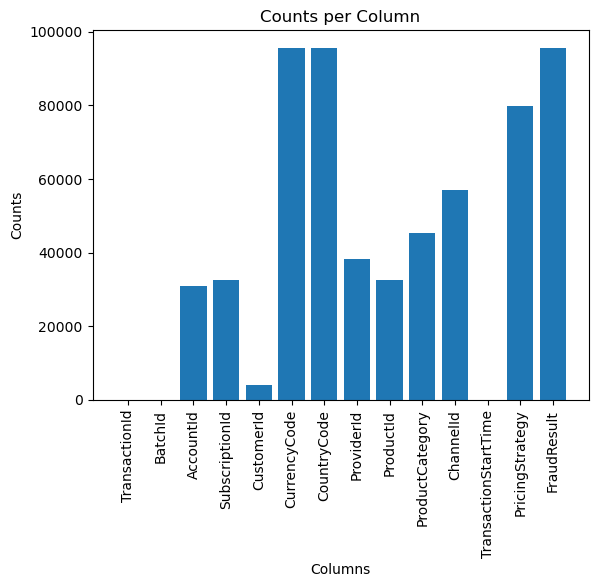

In [7]:
# Data
labels = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode',
          'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime', 'PricingStrategy',
          'FraudResult']
counts = [1, 28, 30893, 32630, 4091, 95662, 95662, 38189, 32635, 45405, 56935, 17, 79848, 95469]

# Bar chart
plt.bar(labels, counts)
plt.xticks(rotation='vertical')
plt.xlabel('Columns')
plt.ylabel('Counts')
plt.title('Counts per Column')

plt.show()

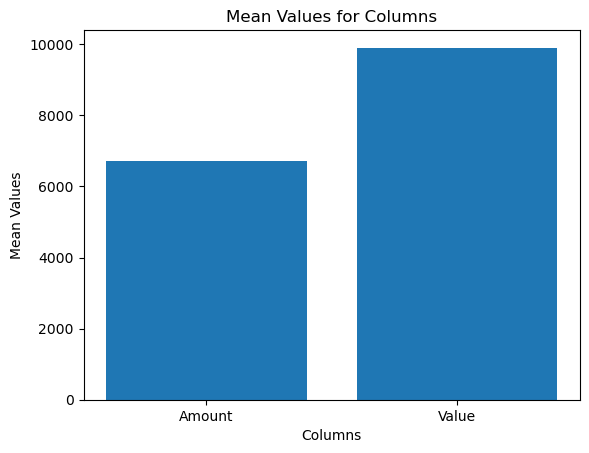

In [8]:
# Data
columns = ['Amount', 'Value']
mean_values = [frequent_items['Amount'], frequent_items['Value']]

# Bar chart
plt.bar(columns, mean_values)
plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.title('Mean Values for Columns')

plt.show()

TransactionId: There is only one transaction with a TransactionId of 1. This indicates that the TransactionId might be a unique identifier for each transaction, ensuring data integrity and avoiding duplicate entries.
BatchId: There are 28 transactions with a BatchId of 67019. This suggests that these transactions might be grouped together for some specific processing or reporting purposes.
AccountId: There are 30,893 transactions associated with the AccountId 4841. This indicates that AccountId 4841 is quite active and has a significant number of transactions, possibly representing a regular customer or an important account.
SubscriptionId: There are 32,630 transactions with the SubscriptionId 3829. This suggests that SubscriptionId 3829 might correspond to a popular or widely used subscription service.
CustomerId: There are 4,091 transactions associated with the CustomerId 7343. This indicates that CustomerId 7343 might be a relatively active customer, engaging in multiple transactions.
CurrencyCode and CountryCode: The currency code UGX and country code 256.0 appear in 95,662 transactions, indicating that these transactions are likely from Uganda, as the currency code UGX represents the Ugandan shilling.
ProviderId: There are 38,189 transactions associated with the ProviderId 4. This suggests that ProviderId 4 is a significant provider and is involved in a large number of transactions.
ProductId and ProductCategory: There are 32,635 transactions associated with the ProductId 6 and the product category "financial_services" appears in 45,405 transactions. This indicates that financial services (represented by the product category) and ProductId 6 are popular among customers, potentially indicating a high demand for financial products.
ChannelId: There are 56,935 transactions associated with the ChannelId 3. This suggests that ChannelId 3 is a predominant channel through which transactions are conducted, possibly representing a specific distribution channel or platform.
TransactionStartTime: There are 17 transactions with a TransactionStartTime of 2018-12-24T16:30:13Z. This specific timestamp may indicate a particular event, such as a system update or a batch processing time.
PricingStrategy: There are 79,848 transactions with a PricingStrategy of 2. This implies that PricingStrategy 2 is commonly used, potentially indicating a specific pricing model or strategy.
FraudResult: There are 95,469 transactions classified as non-fraudulent (FraudResult = 0). This suggests that the majority of the transactions in the dataset are classified as non-fraudulent, highlighting the importance of fraud detection and prevention measures.
These insights provi